## Insight 2:
### ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en Argentina y Colombia a lo largo del tiempo?

### Importamos librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Importamos los datos 

In [3]:
df_covid_limpio = pd.read_csv('covid_clean.csv', sep=';')

### Verificamos las estructuras de datos

In [4]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      48902 non-null  object 
 1   Country_code       48902 non-null  object 
 2   Country            48902 non-null  object 
 3   New_cases          48902 non-null  int64  
 4   Cumulative_cases   48902 non-null  int64  
 5   New_deaths         48902 non-null  int64  
 6   Cumulative_deaths  48902 non-null  int64  
 7   lethality_rate     48902 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 3.0+ MB


Convertimos Date_reported a DateTime

In [5]:
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      48902 non-null  datetime64[ns]
 1   Country_code       48902 non-null  object        
 2   Country            48902 non-null  object        
 3   New_cases          48902 non-null  int64         
 4   Cumulative_cases   48902 non-null  int64         
 5   New_deaths         48902 non-null  int64         
 6   Cumulative_deaths  48902 non-null  int64         
 7   lethality_rate     48902 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.0+ MB


### Casos Colombia

In [6]:
#Daily New Cases Colombia
grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_cases'].sum().unstack()
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.set_index('Country')
grouped_df = grouped_df.loc[['Colombia']]
fechas = grouped_df.columns
new_cases_col = grouped_df[fechas].diff(axis=1).fillna(grouped_df[fechas]).sum(axis=0)
new_cases_col = new_cases_col[new_cases_col > 0]
new_cases_col

Date_reported
2020-03-08       1.0
2020-03-15      15.0
2020-03-22     180.0
2020-03-29     527.0
2020-04-05     544.0
               ...  
2023-12-24     560.0
2023-12-31     692.0
2024-01-07     978.0
2024-01-14    2156.0
2024-01-21    2307.0
Length: 201, dtype: float64

Text(0.5, 1.0, 'Dayli New Cases (Colombia)')

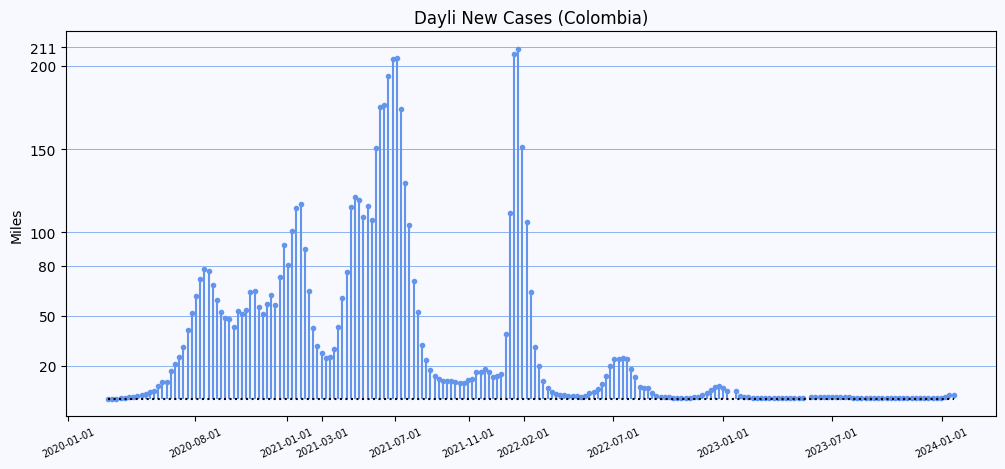

In [7]:
#Colombia
plt.rcParams["axes.facecolor"] = "#F8F8FF"
fig, ax = plt.subplots(figsize=(12, 5),facecolor='#F8F8FF')
ax.stem(new_cases_col.index, new_cases_col.values/1e3,basefmt = 'k:',markerfmt= '.',linefmt ='#6495ED')
plt.axhline(200,color = '#6495ED',linewidth = 0.5)
plt.axhline(211,color = '#6495ED',linewidth = 0.5)
plt.axhline(150,color = '#6495ED',linewidth = 0.5)
plt.axhline(100,color = '#6495ED',linewidth = 0.5)
plt.axhline(80,color = '#6495ED',linewidth = 0.5)
plt.axhline(50,color = '#6495ED',linewidth = 0.5)
plt.axhline(20,color = '#6495ED',linewidth = 0.5)
plt.ylabel('Miles')
plt.yticks([211,200,150,100,50,80,20])
plt.xticks(['2020-01','2020-08','2021-01','2021-07','2022-02','2023-01','2023-07','2024-01','2022-07','2021-03','2021-11'],rotation =25,fontsize=7)
plt.title('Dayli New Cases (Colombia)')

**¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?(Colombia)**

**Conclusión**

En la gráfica de Colombia se puede observar un aumento notable de nuevos casos en agosto del 2020, reportando un pico de 80 mil, empezando el 2021 superó los 100 mil casos, posteriormente en el mes de marzo hubo una disminución notable de casos, por debajo de los 50 mil, para julio se reporta un pico de más de 200 mil contagios, entre el mes de septiembre de 2021 y enero de 2022 podemos observar otra disminución muy notable por debajo de los 20 mil casos. El pico más alto de contagios diarios se tiene en febrero del 2022 donde superó los 210 mil casos, posterior a esas fechas no hubo un aumento notable de casos, estuvieron por debajo de los 30 mil.

### Casos Argentina

In [8]:
#Daily New Cases Argentina
grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_cases'].sum().unstack()
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.set_index('Country')
grouped_df = grouped_df.loc[['Argentina']]
fechas = grouped_df.columns
new_cases_Arg = grouped_df[fechas].diff(axis=1).fillna(grouped_df[fechas]).sum(axis=0)
new_cases_Arg = new_cases_Arg[new_cases_Arg > 0]
new_cases_Arg

Date_reported
2020-03-08      22.0
2020-03-15     109.0
2020-03-22     405.0
2020-03-29     746.0
2020-04-05     791.0
               ...  
2023-12-17     620.0
2023-12-24     609.0
2023-12-31     854.0
2024-01-07    1635.0
2024-01-14    2583.0
Length: 191, dtype: float64

Text(0.5, 1.0, 'Dayli New Cases (Argentina)')

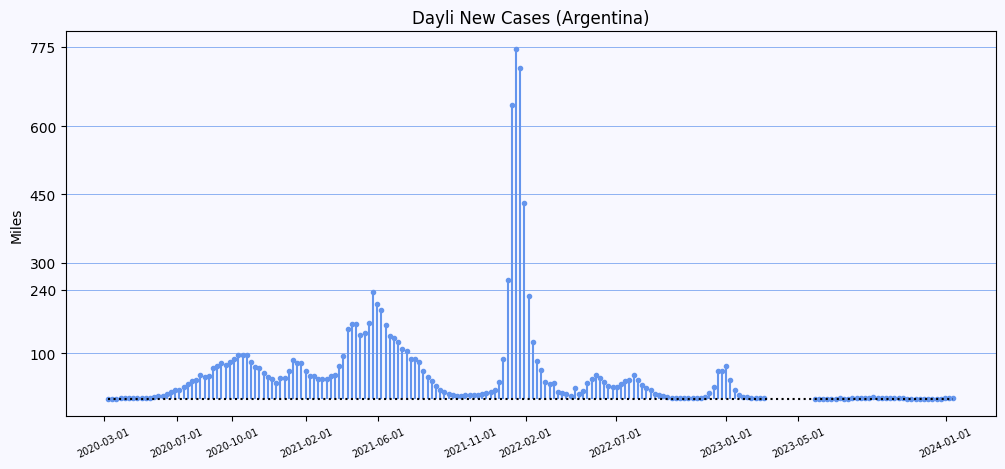

In [9]:
#ARGENTINA
plt.rcParams["axes.facecolor"] = "#F8F8FF"
fig, ax = plt.subplots(figsize=(12, 5),facecolor='#F8F8FF')
ax.stem(new_cases_Arg.index, new_cases_Arg.values/1e3,basefmt = 'k:',markerfmt= '.',linefmt ='#6495ED')
plt.axhline(775,color = '#6495ED',linewidth = 0.5)
plt.axhline(600,color = '#6495ED',linewidth = 0.5)
plt.axhline(450,color = '#6495ED',linewidth = 0.5)
plt.axhline(300,color = '#6495ED',linewidth = 0.5)
plt.axhline(240,color = '#6495ED',linewidth = 0.5)
plt.axhline(100,color = '#6495ED',linewidth = 0.5)
plt.ylabel('Miles')
plt.xticks(['2020-03','2024-01','2022-07','2022-02','2021-06','2020-10','2021-11','2021-02','2020-07','2023-01','2023-05'],rotation =25,fontsize=7)
plt.yticks([775,600,450,300,240,100])
plt.title('Dayli New Cases (Argentina)')

**¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?(Argentina)**

**Conclusión**

En la gráfica de Argentina se puede observar un pico de 100 mil contagios en octubre de 2020, para junio de 2021 produce un pico de 240 mil. El mayor registro de contagios diarios es entre enero y febrero de 2022 reportando un pico de 775 mil